# Hackathon III - MLOps

In previous notebooks I've already preprocess the data and created a dataset for training (ItemSalesSupervised), and also splitted the data into Train/Test.

🚜 ItemSalesSupervised: 695 entries

🚚 datatrain: 660 entries
🚚 datatest :  35 entries

 In this notebook the scope will be:
- 👉 Split the data into: Train / Test / Validation
- 👉 Train a Regression Model Pipeline
- 👉 Evaluate the model
- 👉 Log the model and the metrics using MLflow
- 👉 Register the model in MLflow
- 👉 Deploy the model to a REST API <-- I'll try with Docker 🐋
- 👉 Make predictions using the REST API
- 👉 Upload the predictions to the database


If possible, I'll use:

- ✅ GridSearch
- ✅ LazyRegressor (https://lazypredict.readthedocs.io/en/latest/index.html)

I'll avoid:

- ❌ Pushing passwords or sensitive information to the repository (It's a VERY bad practice)
- ❌ Pushing files generated by MLFlow like `mlruns` (it's a bad practice)

In [1]:
# Avoid unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

In [62]:
import pandas as pd
import numpy as np

## Load the data

First step always is data loading. CSV are provided and can be replicated from the previows lesson. CSVs contains data for the PRODUCT_ID 3960.

- 👉 Load train and test datasets.
- 👉 Set "fecha_venta" as index column.
- 👉 Sort the data by "fecha_venta" column.
- 👉 Show the first 5 rows of the train dataset.

In [2]:

# 👇 Code Goes Here
TRAIN_DATA_PATH = 'data/datatrain.csv'
df_train = pd.read_csv(TRAIN_DATA_PATH)
df_train =df_train.set_index('fecha_venta').sort_index()
df_train.head()

,var1(t-7 day),var1(t-6 day),var1(t-5 day),var1(t-4 day),var1(t-3 day),var1(t-2 day),var1(t-1 day),var1(t-5 week),var1(t-4 week),var1(t-3 week),var1(t-2 week),var1(t-1 week),var1(t),tipo_festivo,day,dayofweek,month,year,weekday
fecha_venta,,,,,,,,,,,,,,,,,,,
2021-06-05,309.0,357.0,240.0,207.0,171.0,153.0,228.0,402.0,276.0,216.0,306.0,309.0,321.0,0,5,6,6,2021,0
2021-06-06,357.0,240.0,207.0,171.0,153.0,228.0,321.0,369.0,345.0,324.0,453.0,357.0,318.0,0,6,7,6,2021,0
2021-06-07,240.0,207.0,171.0,153.0,228.0,321.0,318.0,228.0,174.0,177.0,141.0,240.0,204.0,0,7,1,6,2021,1
2021-06-08,207.0,171.0,153.0,228.0,321.0,318.0,204.0,237.0,174.0,216.0,210.0,207.0,231.0,0,8,2,6,2021,1
2021-06-09,171.0,153.0,228.0,321.0,318.0,204.0,231.0,288.0,180.0,162.0,243.0,171.0,198.0,0,9,3,6,2021,1


In [3]:
df_train.count()

var1(t-7 day)     660
var1(t-6 day)     660
var1(t-5 day)     660
var1(t-4 day)     660
var1(t-3 day)     660
var1(t-2 day)     660
var1(t-1 day)     660
var1(t-5 week)    660
var1(t-4 week)    660
var1(t-3 week)    660
var1(t-2 week)    660
var1(t-1 week)    660
var1(t)           660
tipo_festivo      660
day               660
dayofweek         660
month             660
year              660
weekday           660
dtype: int64

In [5]:
# 👇 Same process por Test
TEST_DATA_PATH = 'data/datatest.csv'
df_test = pd.read_csv(TEST_DATA_PATH)
df_test =df_test.set_index('fecha_venta').sort_index()
df_test.head()

,var1(t-7 day),var1(t-6 day),var1(t-5 day),var1(t-4 day),var1(t-3 day),var1(t-2 day),var1(t-1 day),var1(t-5 week),var1(t-4 week),var1(t-3 week),var1(t-2 week),var1(t-1 week),var1(t),tipo_festivo,day,dayofweek,month,year,weekday
fecha_venta,,,,,,,,,,,,,,,,,,,
2023-03-27,153.0,216.0,216.0,270.0,150.0,309.0,321.0,258.0,294.0,201.0,150.0,153.0,183.0,0,27,1,3,2023,1
2023-03-28,216.0,216.0,270.0,150.0,309.0,321.0,183.0,255.0,486.0,168.0,219.0,216.0,156.0,0,28,2,3,2023,1
2023-03-29,216.0,270.0,150.0,309.0,321.0,183.0,156.0,189.0,171.0,183.0,192.0,216.0,207.0,0,29,3,3,2023,1
2023-03-30,270.0,150.0,309.0,321.0,183.0,156.0,207.0,252.0,258.0,177.0,255.0,270.0,192.0,0,30,4,3,2023,1
2023-03-31,150.0,309.0,321.0,183.0,156.0,207.0,192.0,294.0,273.0,255.0,177.0,150.0,216.0,0,31,5,3,2023,1


In [6]:
df_test.count()

var1(t-7 day)     35
var1(t-6 day)     35
var1(t-5 day)     35
var1(t-4 day)     35
var1(t-3 day)     35
var1(t-2 day)     35
var1(t-1 day)     35
var1(t-5 week)    35
var1(t-4 week)    35
var1(t-3 week)    35
var1(t-2 week)    35
var1(t-1 week)    35
var1(t)           35
tipo_festivo      35
day               35
dayofweek         35
month             35
year              35
weekday           35
dtype: int64

## Split data into train and validation sets

We will split the data into train and test sets. We will use the train set to train the model and the test set to evaluate it.


- 👉 Select the feature columns and the label columns
- 👉 Split the data into train and validation sets using a 90/10 ratio.
- 💡 Remember how train/val split should be made in time series problems.

In [7]:
df_train.columns

Index(['var1(t-7 day)', 'var1(t-6 day)', 'var1(t-5 day)', 'var1(t-4 day)',
       'var1(t-3 day)', 'var1(t-2 day)', 'var1(t-1 day)', 'var1(t-5 week)',
       'var1(t-4 week)', 'var1(t-3 week)', 'var1(t-2 week)', 'var1(t-1 week)',
       'var1(t)', 'tipo_festivo', 'day', 'dayofweek', 'month', 'year',
       'weekday'],
      dtype='object')

In [9]:
# set the product id and family (only for logging purposes, do not use it for filtering)
PRODUCT_ID = 3960
PRODUCT_FAMILY = "BOLLERIA"

# 👇 Code Goes Here
LABEL_COLUMN = 'var1(t)'
FEATURES_COLUMNS = [
    'var1(t-7 day)',
    'var1(t-6 day)',
    'var1(t-5 day)',
    'var1(t-4 day)',
    'var1(t-3 day)',
    'var1(t-2 day)',
    'var1(t-1 day)',
    'var1(t-5 week)',
    'var1(t-4 week)',
    'var1(t-3 week)',
    'var1(t-2 week)',
    'var1(t-1 week)',
    'tipo_festivo',
    'day',
    'dayofweek',
    'month',
    'year',
    'weekday'
    ]


In [10]:
label = df_train[LABEL_COLUMN]
label

fecha_venta
2021-06-05    321.0
2021-06-06    318.0
2021-06-07    204.0
2021-06-08    231.0
2021-06-09    198.0
              ...  
2023-03-22    216.0
2023-03-23    270.0
2023-03-24    150.0
2023-03-25    309.0
2023-03-26    321.0
Name: var1(t), Length: 660, dtype: float64

In [11]:
features = df_train[FEATURES_COLUMNS]
features

,var1(t-7 day),var1(t-6 day),var1(t-5 day),var1(t-4 day),var1(t-3 day),var1(t-2 day),var1(t-1 day),var1(t-5 week),var1(t-4 week),var1(t-3 week),var1(t-2 week),var1(t-1 week),tipo_festivo,day,dayofweek,month,year,weekday
fecha_venta,,,,,,,,,,,,,,,,,,
2021-06-05,309.0,357.0,240.0,207.0,171.0,153.0,228.0,402.0,276.0,216.0,306.0,309.0,0,5,6,6,2021,0
2021-06-06,357.0,240.0,207.0,171.0,153.0,228.0,321.0,369.0,345.0,324.0,453.0,357.0,0,6,7,6,2021,0
2021-06-07,240.0,207.0,171.0,153.0,228.0,321.0,318.0,228.0,174.0,177.0,141.0,240.0,0,7,1,6,2021,1
2021-06-08,207.0,171.0,153.0,228.0,321.0,318.0,204.0,237.0,174.0,216.0,210.0,207.0,0,8,2,6,2021,1
2021-06-09,171.0,153.0,228.0,321.0,318.0,204.0,231.0,288.0,180.0,162.0,243.0,171.0,0,9,3,6,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-22,192.0,255.0,177.0,327.0,369.0,153.0,216.0,264.0,189.0,171.0,183.0,192.0,0,22,3,3,2023,1
2023-03-23,255.0,177.0,327.0,369.0,153.0,216.0,216.0,180.0,252.0,258.0,177.0,255.0,0,23,4,3,2023,1
2023-03-24,177.0,327.0,369.0,153.0,216.0,216.0,270.0,249.0,294.0,273.0,255.0,177.0,0,24,5,3,2023,1


In [12]:
VAL_SPLIT = 0.1
train_size = int(len(df_train)*(1-VAL_SPLIT))
train_size

594

In [25]:
X_train = features[:train_size]
y_train = label[:train_size]
X_val = features[train_size:]
y_val = label[train_size:]



In [83]:
print("X_train: ", len(X_train), "; y_train: ", len(y_train),"; X_val: ", len(X_val),"; y_val: ", len(y_val)  )

X_train:  594 ; y_train:  594 ; X_val:  66 ; y_val:  66


## Start MLFlow Server

- 👉 Launch a local MLFlow server
- 👉 Connect to local MLFlow server
- 👉 Set the desired experiment
- 👉 Enable MLFlow autologing for sklearn

In [15]:
!pip install mlflow
import mlflow

# 👇 Connect to mlflow local server

MLFLOW_TRACKING_URI = "http://127.0.0.1:5000"
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 45.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 6.2 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 3.3 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 31.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 42.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.2 MB/s eta 0:00:00
   

From TERMINAL, $mlflow ui to open MLflow web

In [16]:
# if not working this will raise an exception
experiments = mlflow.search_experiments()

In [27]:
MLFLOW_EXPERIMENT_NAME = 'DSIII-DATAHON-msa'
experiment = mlflow.set_experiment(MLFLOW_EXPERIMENT_NAME)

In [28]:
experiments = mlflow.search_experiments()
experiments

[<Experiment: artifact_location='mlflow-artifacts:/751022049348012281', creation_time=1714309369627, experiment_id='751022049348012281', last_update_time=1714309369627, lifecycle_stage='active', name='DSIII-DATAHON-msa', tags={}>,
 <Experiment: artifact_location='mlflow-artifacts:/0', creation_time=1714309236096, experiment_id='0', last_update_time=1714309236096, lifecycle_stage='active', name='Default', tags={}>]

In [29]:
# Set the autolog sklearn
mlflow.sklearn.autolog()

## Train and evaluate the model

The next section is to train and evaluate the model. We will use a pipeline to preprocess the data and train the model.

- 👉 Create a Sklearn Pipeline:
  - 👉 Preprocessing: StandardScaler or MinMaxScaler
  - 👉 Model: LinearRegression, RandomForestRegressor, etc.
- 👉 Start a run in MLFlow
- 👉 Train the model using the train dataset
- 👉 Add convenient tags for PRODUCT_ID and FAMILY_ID
- 👉 Evaluate the model
- 💡 Remember this is a regression problem
- 💡 Autolog will automatically log metrics and model

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [34]:
# 👇 PIPELINE #1
scaler = MinMaxScaler()
model = LinearRegression()

pipe = Pipeline([

    ('scaler',scaler),
    ('model', model)
])
pipe

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', LinearRegression())])

In [35]:
# Launch run #1

with mlflow.start_run() as run:

   pipe.fit(X_train, y_train)

   mlflow.set_tag('product_id', PRODUCT_ID)
   mlflow.set_tag('family_id', PRODUCT_FAMILY)

   predictions = pipe.predict(X_val)
   mae = metrics.mean_absolute_error(y_val,predictions)
   mse = metrics.mean_squared_error(y_val,predictions)
   r2 = metrics.r2_score(y_val,predictions)



In [38]:
print("mae: ", mae, "\n")
print("mse: ", mse, "\n")
print("r2: ", r2, "\n")

mae:  47.13739202695878 

mse:  3733.418654308631 

r2:  0.5290068529069631 



In [39]:
# 👇 PIPELINE #2

scaler = StandardScaler()
model = LinearRegression()

pipe = Pipeline([

    ('scaler',scaler),
    ('model', model)
])
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [40]:
# Launch run #2

with mlflow.start_run() as run:

   pipe.fit(X_train, y_train)

   mlflow.set_tag('product_id', PRODUCT_ID)
   mlflow.set_tag('family_id', PRODUCT_FAMILY)

   predictions = pipe.predict(X_val)
   mae = metrics.mean_absolute_error(y_val,predictions)
   mse = metrics.mean_squared_error(y_val,predictions)
   r2 = metrics.r2_score(y_val,predictions)


In [41]:
print("mae: ", mae, "\n")
print("mse: ", mse, "\n")
print("r2: ", r2, "\n")

mae:  47.13739202695881 

mse:  3733.418654308637 

r2:  0.5290068529069625 



In [42]:
# 👇 PIPELINE #3

scaler = MinMaxScaler()
model = DecisionTreeRegressor()

pipe = Pipeline([

    ('scaler',scaler),
    ('model', model)
])
pipe

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', DecisionTreeRegressor())])

In [43]:
# Launch run #3

with mlflow.start_run() as run:

   pipe.fit(X_train, y_train)

   mlflow.set_tag('product_id', PRODUCT_ID)
   mlflow.set_tag('family_id', PRODUCT_FAMILY)

   predictions = pipe.predict(X_val)
   mae = metrics.mean_absolute_error(y_val,predictions)
   mse = metrics.mean_squared_error(y_val,predictions)
   r2 = metrics.r2_score(y_val,predictions)


In [44]:
print("mae: ", mae, "\n")
print("mse: ", mse, "\n")
print("r2: ", r2, "\n")

mae:  49.77272727272727 

mse:  4387.772727272727 

r2:  0.4464561633980795 



In [45]:
# 👇 PIPELINE #4

scaler = StandardScaler()
model = DecisionTreeRegressor()

pipe = Pipeline([

    ('scaler',scaler),
    ('model', model)
])
pipe

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', DecisionTreeRegressor())])

In [46]:
# Launch run #4

with mlflow.start_run() as run:

   pipe.fit(X_train, y_train)

   mlflow.set_tag('product_id', PRODUCT_ID)
   mlflow.set_tag('family_id', PRODUCT_FAMILY)

   predictions = pipe.predict(X_val)
   mae = metrics.mean_absolute_error(y_val,predictions)
   mse = metrics.mean_squared_error(y_val,predictions)
   r2 = metrics.r2_score(y_val,predictions)


In [47]:
print("mae: ", mae, "\n")
print("mse: ", mse, "\n")
print("r2: ", r2, "\n")

mae:  50.13636363636363 

mse:  4274.045454545455 

r2:  0.4608035407087673 



In [51]:
# 👇 PIPELINE #5
scaler = MinMaxScaler()
model = GradientBoostingRegressor(learning_rate = 0.1, random_state=42)

pipe = Pipeline([

    ('scaler',scaler),
    ('model', model)
])
pipe

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model', GradientBoostingRegressor(random_state=42))])

In [52]:
# Launch run #5

with mlflow.start_run() as run:

   pipe.fit(X_train, y_train)

   mlflow.set_tag('product_id', PRODUCT_ID)
   mlflow.set_tag('family_id', PRODUCT_FAMILY)

   predictions = pipe.predict(X_val)
   mae = metrics.mean_absolute_error(y_val,predictions)
   mse = metrics.mean_squared_error(y_val,predictions)
   r2 = metrics.r2_score(y_val,predictions)


In [53]:
print("mae: ", mae, "\n")
print("mse: ", mse, "\n")
print("r2: ", r2, "\n")

mae:  44.5024488971508 

mse:  3412.2615735953013 

r2:  0.56952274414831 



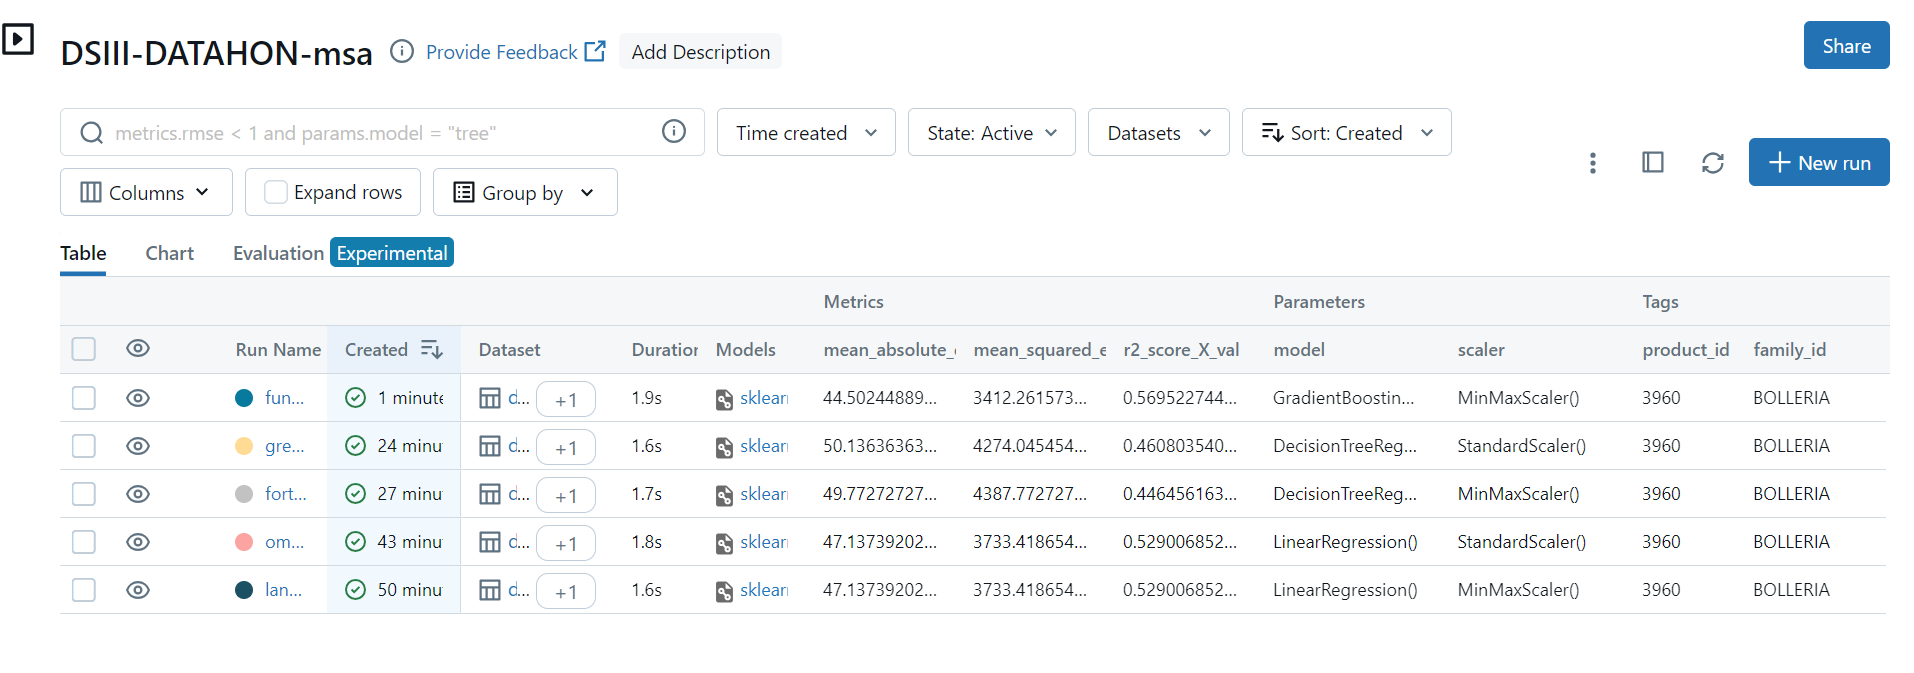

In [54]:
from IPython.display import Image

# Image's path
imagen_local = "images/runs.png"

# Show the image
Image(filename=imagen_local)


In [82]:
# Merging results with estimation from grocer
comparison = pd.DataFrame({'yreal': y_val, 'ypred': predictions})
comparison["fecha"] = testdates

# Screen print metrics
print("Métricas predicción - real")
print("--MSE")
print(mean_squared_error(comparison["yreal"].to_list(),comparison["ypred"].to_list()))
print("--MAE")
print(mean_absolute_error(comparison["yreal"].to_list(),comparison["ypred"].to_list()))
print("--Error acumulado")
print(sum(abs(np.array(comparison["yreal"].to_list())-np.array(comparison["ypred"].to_list()))))

ValueError: Length of values (35) does not match length of index (66)

## Register the model

Promote the model to Model Registry. For this section you can choose between using the MLflow UI or using code snipets. If you choose the UI you should provide screenshots.

**Model registered from MLflow UI**

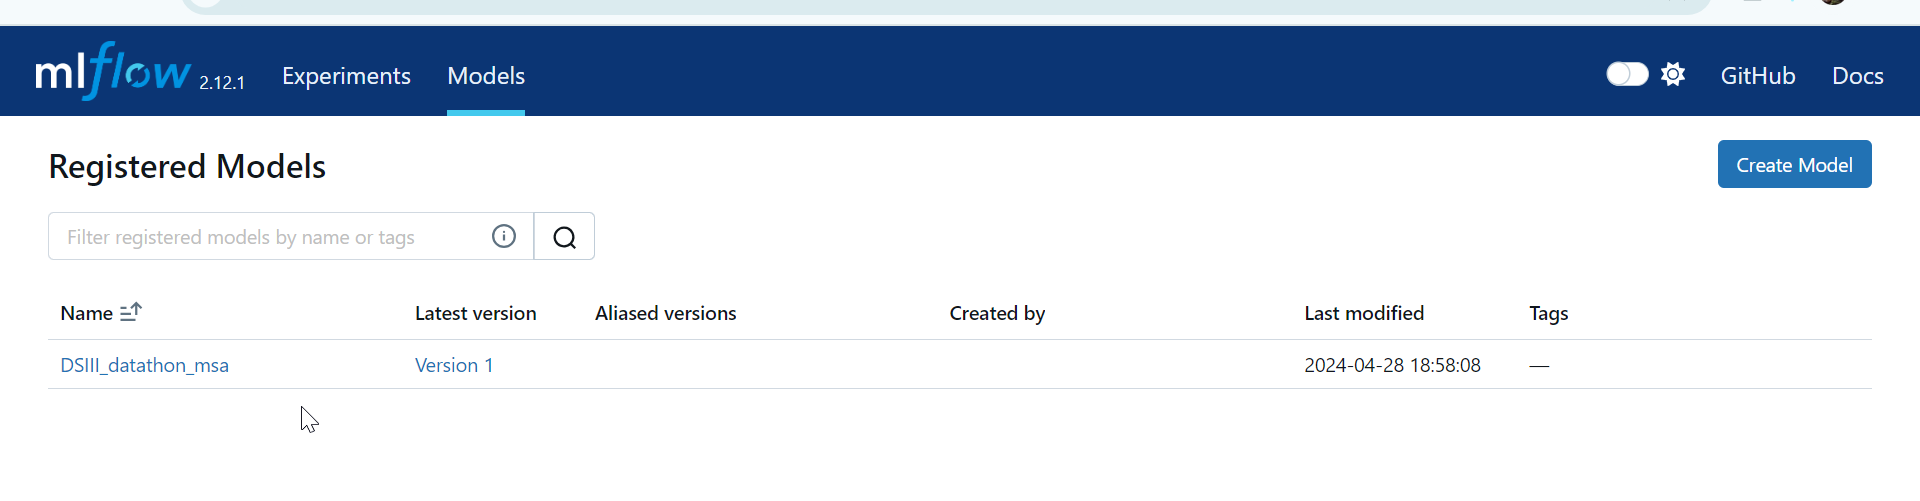

In [84]:
# Image's path
imagen_local = "images/model_reg.png"

# Show the image
Image(filename=imagen_local)


## Tag the Model

We can assign a tag to the model to indicate that it is ready for production. This way all versions (v1, v2...) of the model will have the same tag. So we can deploy the model by selecting the (same) tag instead of a specific (different) version.

For this section you can choose between using the MLflow UI or using code snipets. If you choose the UI you should provide screenshots.

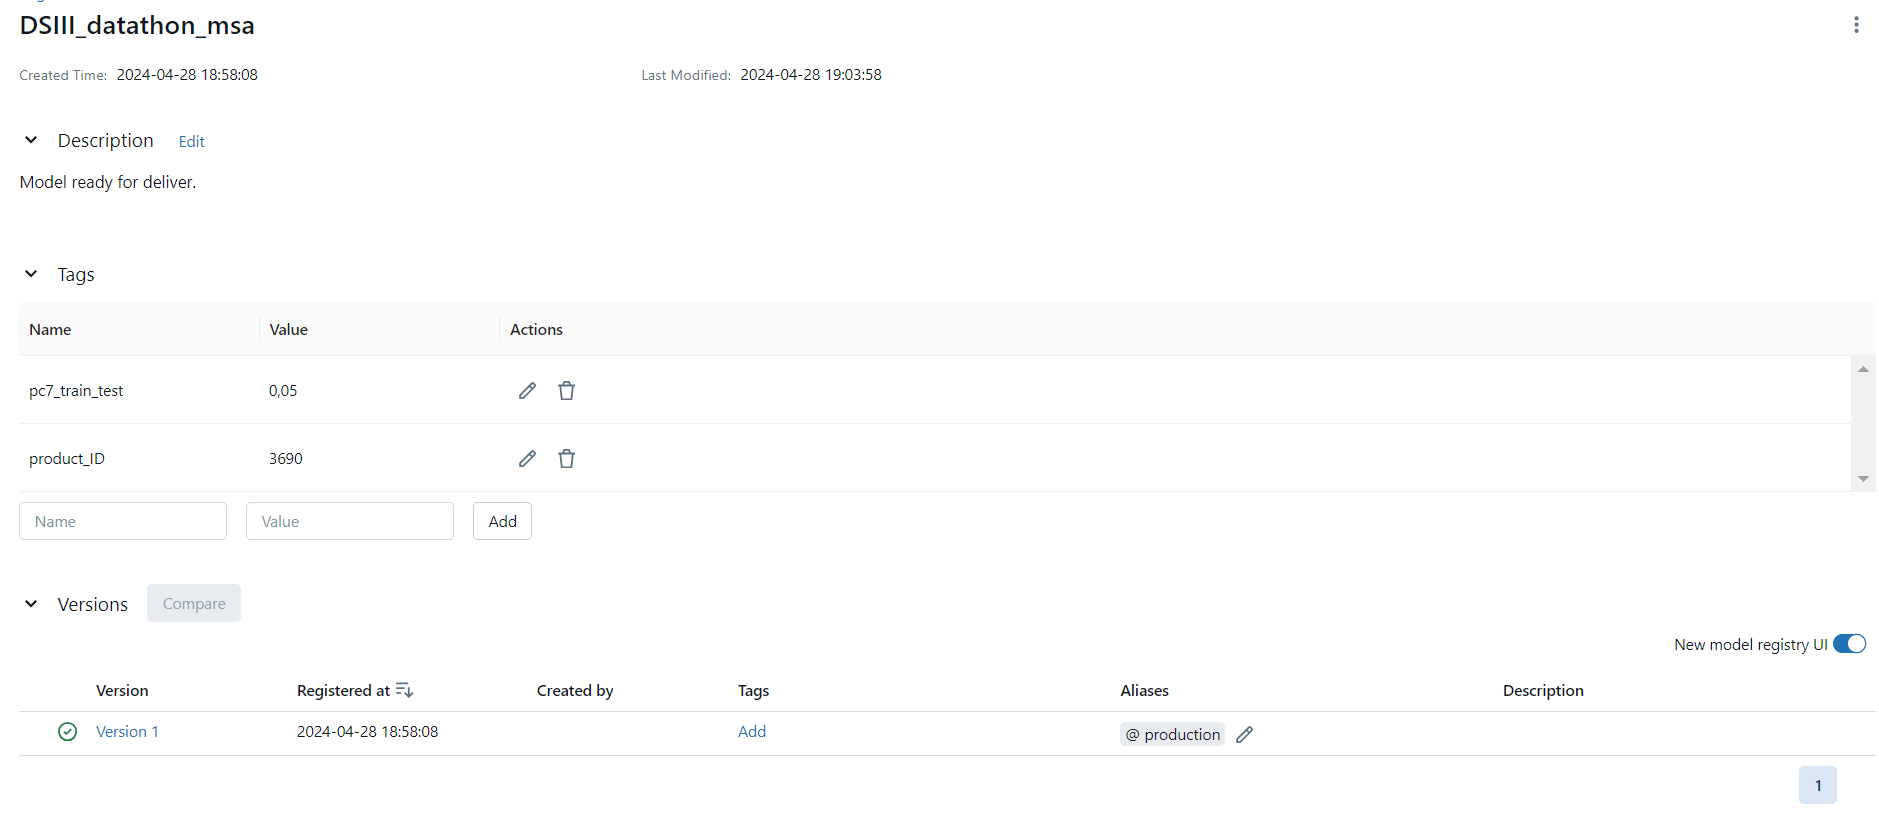

In [85]:
# Image's path
imagen_local = "images/model_tag.png"

# Show the image
Image(filename=imagen_local)


## Deploy the model

In a terminal run the following command to deploy the model:

```bash
export MLFLOW_TRACKING_URI=http://localhost:5000

_mlflow models serve -m models:/<model_name>@production -p 5001 --env-manager local_
*mlflow models serve -m models:/<model_name>@production -p 5001 --env-manager local*

mlflow models serve -m models:/DATATHON_sales_forecasting@production -p 5001 --env-manager local
```

You should see something like this:

```bash
[INFO] Starting gunicorn 21.2.0
[INFO] Listening at: http://127.0.0.1:5001 (236041)
[INFO] Using worker: sync
[INFO] Booting worker with pid: 236048
```

It means it's working correctly 🎉



## Make requests to the model

The model is now deployed and ready to receive requests. We will make a request to the model using the test set.

- 👉 prepare the test set to be sent as JSON
- 👉 make a POST request to the model
- 👉 get the predictions from the response and show them

In [ ]:
df_test.head()

,var1(t-7 day),var1(t-6 day),var1(t-5 day),var1(t-4 day),var1(t-3 day),var1(t-2 day),var1(t-1 day),var1(t-5 week),var1(t-4 week),var1(t-3 week),...,var1(t),tavg_w,tmin_w,tmax_w,isfestivo,day,dayofweek,month,year,weekday
fecha_venta,,,,,,,,,,,,,,,,,,,,,
2023-04-07,216.0,210.0,315.0,210.0,204.0,231.0,327.0,273.0,255.0,177.0,...,330.0,13.9,8.5,19.8,1,7,5,4,2023,1
2023-04-08,210.0,315.0,210.0,204.0,231.0,327.0,330.0,303.0,312.0,327.0,...,267.0,14.1,6.4,21.5,1,8,6,4,2023,0
2023-04-09,315.0,210.0,204.0,231.0,327.0,330.0,267.0,429.0,276.0,369.0,...,315.0,14.9,9.3,20.6,1,9,7,4,2023,0
2023-04-10,210.0,204.0,231.0,327.0,330.0,267.0,315.0,201.0,150.0,153.0,...,213.0,22.8,12.7,33.7,0,10,1,4,2023,1
2023-04-11,204.0,231.0,327.0,330.0,267.0,315.0,213.0,168.0,219.0,216.0,...,153.0,17.8,14.6,22.6,0,11,2,4,2023,1


In [ ]:
df_test.describe()

,var1(t-7 day),var1(t-6 day),var1(t-5 day),var1(t-4 day),var1(t-3 day),var1(t-2 day),var1(t-1 day),var1(t-5 week),var1(t-4 week),var1(t-3 week),...,var1(t),tavg_w,tmin_w,tmax_w,isfestivo,day,dayofweek,month,year,weekday
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,...,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.0,24.0,24.000000
mean,241.875000,241.375000,242.875000,236.500000,236.750000,235.875000,236.625000,245.875000,235.250000,244.625000,...,236.750000,19.162500,13.750000,25.625000,0.125000,18.500000,4.250000,4.0,2023.0,0.666667
std,60.239603,60.512889,60.146425,60.277619,60.175287,60.821415,60.869649,74.853662,64.354487,66.531335,...,61.066073,3.118084,3.209361,3.952352,0.337832,7.071068,2.048329,0.0,0.0,0.481543
min,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,150.000000,150.000000,150.000000,...,138.000000,13.900000,6.400000,19.800000,0.000000,7.000000,1.000000,4.0,2023.0,0.000000
25%,204.000000,204.000000,204.000000,201.000000,201.000000,189.750000,189.750000,181.500000,189.750000,201.000000,...,189.750000,16.300000,10.950000,22.100000,0.000000,12.750000,2.750000,4.0,2023.0,0.000000
50%,219.000000,219.000000,226.500000,219.000000,219.000000,219.000000,219.000000,237.000000,216.000000,216.000000,...,219.000000,19.250000,14.550000,26.250000,0.000000,18.500000,4.500000,4.0,2023.0,1.000000
75%,301.500000,301.500000,301.500000,281.250000,281.250000,281.250000,281.250000,304.500000,284.250000,315.000000,...,281.250000,21.350000,15.650000,27.800000,0.000000,24.250000,6.000000,4.0,2023.0,1.000000
max,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,429.000000,369.000000,369.000000,...,336.000000,25.600000,18.700000,34.300000,1.000000,30.000000,7.000000,4.0,2023.0,1.000000


In [ ]:
import requests
import json

In [ ]:

# 👇 Code Goes Here

URL = 'http://127.0.0.1:5001/invocations'
headers =  {'Content-Type': 'application/json'}

data = {
    'dataframe_split':{
        'columns': df_test.columns.to_list(),
        'index': df_test.index.to_list(),
        'data': df_test.values.tolist()
    }
}

response = requests.post(URL, headers=headers, data=json.dumps(data))
response.json()

{'predictions': [282.1231955165853,
  350.92476790019685,
  362.18475655844634,
  200.1818751650317,
  195.7095204924094,
  189.35267373875197,
  210.47152365351366,
  199.48532098600472,
  263.7772953992881,
  309.2002999810172,
  207.74583822834694,
  189.8887382479513,
  209.09634820421022,
  202.0974450183197,
  226.40405942074185,
  271.3950142872435,
  317.7629131535849,
  209.96561710581975,
  195.9029014666901,
  209.91992695972968,
  199.86892423547928,
  227.64740084242115,
  259.00295824870227,
  303.49660862262056]}

In [ ]:
predictions = response.json()['predictions']
predictions

[282.1231955165853,
 350.92476790019685,
 362.18475655844634,
 200.1818751650317,
 195.7095204924094,
 189.35267373875197,
 210.47152365351366,
 199.48532098600472,
 263.7772953992881,
 309.2002999810172,
 207.74583822834694,
 189.8887382479513,
 209.09634820421022,
 202.0974450183197,
 226.40405942074185,
 271.3950142872435,
 317.7629131535849,
 209.96561710581975,
 195.9029014666901,
 209.91992695972968,
 199.86892423547928,
 227.64740084242115,
 259.00295824870227,
 303.49660862262056]

## Push Results to Database

We push the results to the database so we can visualize them using other tools like Tableau, PowerBI, etc.

In [ ]:
df_test.index.to_list()

['2023-04-07',
 '2023-04-08',
 '2023-04-09',
 '2023-04-10',
 '2023-04-11',
 '2023-04-12',
 '2023-04-13',
 '2023-04-14',
 '2023-04-15',
 '2023-04-16',
 '2023-04-17',
 '2023-04-18',
 '2023-04-19',
 '2023-04-20',
 '2023-04-21',
 '2023-04-22',
 '2023-04-23',
 '2023-04-24',
 '2023-04-25',
 '2023-04-26',
 '2023-04-27',
 '2023-04-28',
 '2023-04-29',
 '2023-04-30']

In [ ]:
!pip install pymysql

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.1 MB/s eta 0:00:00


In [ ]:
# Helpfull class used to connect to the database and push dataframes

import sqlalchemy as sa


class DatabaseConnection:

    def __init__(
        self,
        username: str,
        password: str,
        dialect: str = "mysql",
        driver: str = "pymysql",
        host: str = "database-1.cxlpff3hacbu.eu-west-3.rds.amazonaws.com",
        port: int = 3306,
        database: str = "sandbox",
    ) -> None:
        """Creates a connection to a database

        Args:
            username (str): username
            password (str): password
            dialect (str, optional): dialect. Defaults to "mysql".
            driver (str, optional): driver. Defaults to "pymysql".
            host (str, optional): host. Defaults to "database-1.crek3tiqyj7r.eu-west-3.rds.amazonaws.com".
            port (int, optional): port. Defaults to 3306.
            database (str, optional): database. Defaults to "classicmodels".
        """

        connection_string = f"{dialect}+{driver}://{username}:{password}@{host}:{port}/{database}"
        self.engine = sa.create_engine(connection_string)

    def insert_dataframe(self, df: pd.DataFrame, table_name: str) -> None:
        """Inserts a dataframe into a table

        Args:
            df (pd.DataFrame): dataframe to insert
            table_name (str): table name
        """
        df.to_sql(table_name, self.engine, if_exists="replace", index=False)

    def query_to_df(self, query: str) -> pd.DataFrame:
        """Retrieves a dataframe from a query.

        Args:
            query (str): query to perform.

        Returns:
            pd.DataFrame: daframe with the results of the query.
        """
        with self.engine.connect() as conn:
            df = pd.read_sql_query(query, conn)
            return df

    def check_connection(self) -> bool:
        """Checks if the connection is working

        Returns:
            bool: True if the connection is working, False otherwise
        """
        try:
            self.engine.connect()
        except Exception as e:
            print(e)
            return False

Prepare the dataframe to upload to the database

In [ ]:
# 👇 Fill this schema with the relevant data

dates = df_test.index.to_list()

# Create a dataframe with the data to store
df_article_prediction = pd.DataFrame({
    "fecha": dates,
    "cantidad": predictions,
    "cantidad_real": df_test[LABEL_COLUMN].values, #the real sales from the original dataframe
    "articulo": [PRODUCT_ID] * len(predictions),  # repeat the article for each date
    "familia": [PRODUCT_FAMILY] * len(predictions),  # repeat the family for each date
})

In [ ]:
df_article_prediction

,fecha,cantidad,cantidad_real,articulo,familia
0,2023-04-07,282.123196,330.0,3960,BOLLERIA
1,2023-04-08,350.924768,267.0,3960,BOLLERIA
2,2023-04-09,362.184757,315.0,3960,BOLLERIA
3,2023-04-10,200.181875,213.0,3960,BOLLERIA
4,2023-04-11,195.709520,153.0,3960,BOLLERIA
5,2023-04-12,189.352674,183.0,3960,BOLLERIA
6,2023-04-13,210.471524,138.0,3960,BOLLERIA
7,2023-04-14,199.485321,204.0,3960,BOLLERIA
8,2023-04-15,263.777295,276.0,3960,BOLLERIA
9,2023-04-16,309.200300,333.0,3960,BOLLERIA


Push the dataframe to the database

In [ ]:
# Database credentials
USER = 'usuario1'
PASSWORD = 'xxxxxxxxxx'
NAME = "marina"
table_name = f"Materials_Prediction_Group_{NAME}"


# Connect to the database
db = DatabaseConnection(USER, PASSWORD)
db.insert_dataframe(df_article_prediction, table_name)